<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Bagging and Random Forest

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Bagging and Random Forest**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Decision Tree](https://youtu.be/JUGo1Pu3QT4?si=ebQXv6Yglar0mYWp)
* [Random Forest](https://youtu.be/m5_wk310fho?si=up-mzVPHvniXsYE6)
* [Gradient Boosting](https://youtu.be/___T8_ixIwc?si=ozHR_eIuMF3SPTxJ)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivations for Bagging and Random Forest

Decision tree are not the most powerful, cutting edge method in machine learning, but,

* one of the most understandable, interpretable predictive machine learning modeling

<figure style="text-align: center;">
  <img src="_static/ensemble/spruce.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;"> Solitary black spruce tree in Hinton, Alberta, Canada, image from https://hikebiketravel.com/6-fun-things-to-do-in-hinton-alberta-in-winter.
</figcaption>
</figure>
  
* decision trees are enhanced with random forests, bagging and boosting to be one of the best models in many cases

<figure style="text-align: center;">
  <img src="_static/ensemble/forest.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Black spruce forest near Hinton, Alberta, east of Jasper National Park, Canada, image from https://en.wikivoyage.org/wiki/Hinton.
</figcaption>
</figure>

Now we cover ensemble trees, tree bagging and random forest building on decision trees. First, I provide some prerequisite concepts for decision trees and then for ensemble methods.

* if you are not familiar with decision trees it may be a good idea to review the [Decision Tree Chapter](https://geostatsguy.github.io/MachineLearningDemos_Book/MachineLearning_decision_tree.html).

#### Tree Model Formulation

The prediction feature space is partitioned into $J$ exhaustive, mutually exclusive regions $R_1, R_2, \ldots, R_J$. For a given prediction case $x_1,\ldots,x_m \in R_j$, the prediction is:

**Regression** - the average of the training data in the region, $R_j$

$$
\hat{y} = \frac{1}{|R_j|} \sum_{\mathbf{x}_i \in R_j} y_i
$$

where $\hat{y}$ is the predicted value for input $\mathbf{x}$, $R_j$ is the region (leaf node) that $\mathbf{x}$ falls into, $|R_j|$ is the number of training samples in region $R_j$, and $y_i$ is the actual target values of those training samples in $R_j$.

**Classification** - category with the plurality of training cases (most common case) in region $R_j$:

$$
\hat{y} = \arg\max_{c \in C} \left( \frac{1}{|R_j|} \sum_{\mathbf{x}_i \in R_j} \mathbb{1}(y_i = c) \right)
$$

where $C$ is the set of all possible categories, $\mathbb{1}(y_i = c)$ is indicator transform, 1 if $y_i = c$, 0 otherwise, $|R_j|$ is the number of training samples in region $R_j$, and $\hat{y}$ is the predicted class label.

The predictor space, $𝑋_1,\ldots,𝑋_𝑚$, is segmented into $J$ mutually exclusive, exhaustive regions, $R_j, j = 1,\ldots,J$, where the regions are,

* **mutually exclusive** – any combination of predictor features, $x_1,\ldots,x_𝑚$, only belongs to a single region, $R_j$ 
  
* **exhaustive** – all combinations of predictor feature values belong a region, $R_j$, i.e., all the regions, $R_j, j = 1,\ldots,J$, cover entire predictor  feature space

All prediction cases, $x_1,\ldots,x_m$ that fall in the same region, $R_j$, are estimated with the same value.

* the prediction model inherently discontinuous at the region boundaries

For example, consider this decision tree prediction model for the production response feature, $\hat{Y}$ ̂from porosity, $X_1$, predictor feature,

<figure style="text-align: center;">
  <img src="_static/decision_tree/regions.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> Four region decision tree with data and predictions, \(\hat{Y}(R_j) = \overline{Y}(R_j)\) by region, \(R_j, j=1,…,4\). For example, given a predictor feature value of 13% porosity, the model predicts about 2,000 MCFPD for production.
</figcaption>
</figure>

How do we segment the predictor feature space? 

* the set of regions based on hierarchical, binary segmentation. 


#### Tree Loss Functions 

For regression trees we minimize the residual sum of squares and for classification trees we minimize the weighted average Gini impurity.

The Residual Sum of Squares (RSS) measures the total squared difference between the actual values and predicted values in a regression tree,

$$
\text{RSS} = \sum_{j=1}^{J} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2
$$

where $J$ is the total number of regions in the tree, $R_j$ is the $j$ region, $y_i$ is the truth value of the response feature at observation the $i$ training data, and $\hat{y}_{R_j}$ is the predicted value for region $R_j$, the mean of $y_i \; \forall \; i \in R_j$.

When a parent node splits into two child nodes \( t_L \) and \( t_R \), the weighted Gini impurity is:

$$
\text{Gini}_{\text{total}} = \sum_{j=1}^{J} \frac{N_j}{N} \cdot \text{Gini}(j)
$$

where $J$ is the total number of regions in the tree, $N$ is the total number of samples in the dataset,   $N_j$ is the number of samples in leaf node $j$, and $\text{Gini}(j)$ is the Gini impurity of leaf node $j$.

The Gini impurity for a single decision tree node is calculated as,

$$
\text{Gini}(j) = 1 - \sum_{c=1}^{C} p_{j,c}^2
$$

where $p_{j,c}$ is the proportion of class $c$ samples in node $j$.

For classification our loss function does not compare the predictions to the truth values like our regression loss! 

* the Gini impurity penalizes mixtures of training data categories! A region of all one category of training data will have a Gini impurity of 0 to contribute to the over all loss.

Note that the by-region Gini impurity is,

* **weighted** - by the number of training data in each regions, regions with more training data have greater impact on the overall loss

* **averaged** - over all the regions to calculate the total Gini impurity of the decision tree

These losses are calculated during,

* **tree model training** - with respect to training data to grow the tree

* **tree model tuning** - with respect to withheld testing data to select the optimum tree complexity.

Let's talk about tree model training first and then tree model tuning.


#### Training the Tree Model

How do we calculate these mutually exclusive, exhaustive regions? This is accomplished through hierarchical binary segmentation of the predictor feature space.

Training a decision tree model is both,

1. assigning the mutual exclusive, exhaustive regions

2. building a decision tree, each region is a terminal node, also known as a leaf node

These are the same thing! Let's list the steps and then walk through a training a tree to demonstrate this.

0. **Assign All Data to a Single Region** - this region covers the entire predictor feature space

1. **Scan All Possible Splits** - over all regions and over all features

2. **Select the Best Split** - this is greedy optimization, i.e., the best split minimizes the residual sum of squares of errors over all the training data $y_i$ over all of the regions $j = 1,\ldots,J$.

3. **Iterate Until Very Overfit** - return to step 1 for the next split until the tree is very overfit.

For brevity we stop here, and make these observations,

* hierarchical, binary segmentation is the same as sequentially building a decision tree, each split adds a new decision node and increases the number of leaf nodes by one.

* the simple decision trees are in the complicated decision tree, i.e., if we build an $8$ leaf node model, we have the $8, 7, \ldots, 2$ leaf node model by sequentially removing the decision nodes, in the order of last one is the first one to remove.

* the ultimate overfit model is number of leaf nodes equal to the number of training data. In this case, the training error is 0.0 as have one region for each training data a we estimate with the training data response feature values for all the at the training data cases.


#### Tuning the Tree Model

To tune the decision tree we take the very overfit trained tree model,

* sequentially cut the last decision node

* i.e., prune the last branch of the decision tree

Since the simpler trees are inside the complicated tree!

We can calculate test error as we prune and select tree with minimum test error

We overfit the decision tree model, with a large number of leaf nodes and then we reduce the number of leaf nodes while tracking the test error.

* we select the number of leaf nodes that minimize the testing error.

* since we are sequentially removing the last branch to simplify the tree, we call model tuning **pruning** for decision trees

Let's discuss decision tree hyperparameters. I prefer number of leaf nodes as my decision tree hyperparameter because it provides,

* **continuous, uniform increase in complexity** -  equal steps in increased complexity without jumps

* **intuitive control on complexity** - we can understand and relate the $2, 3, \ldots, 100$ leaf node decision trees

* **flexible complexity** - the tree is free to grow in any manner to reduce training error, including highly asymmetric decision trees

There are other common decision tree hyperparameters including,

* **Minimum reduction in RSS** – related to the idea that incremental increase in complexity must be offset by sufficient reduction in training error. This could stop the model early, for example, a split with low reduction in training error could lead to a subsequent split with a much larger reduction in training error

* **Minimum number of training data in each region** – related to the concept of accuracy of the by-region estimates, i.e., we need at least $n$ data for a reliable mean and most common category

* **Maximum number of levels** – forces symmetric trees, similar number of splits to get to each leaf node. There is a large change in model complexity with change in the hyperparameter.


#### Ensemble Methods

What is the Testing Accuracy of Our Predictive Machine Learning Models?

Recall the equation for expected test error has three components.

$$
\mathbb{E}\left[(y_0 - \hat{f}(x_1^0, \ldots, x_m^0))^2\right] =
\left(\mathbb{E}[\hat{f}(x_1^0, \ldots, x_m^0)] - f(x_1^0, \ldots, x_m^0)\right)^2 +
\mathbb{E}\left[\left(\hat{f}(x_1^0, \ldots, x_m^0) - \mathbb{E}[\hat{f}(x_1^0, \ldots, x_m^0)]\right)^2\right] +
\sigma_\varepsilon^2
$$

There can be labeled as:

$$
\text{Expected Test Error} = \text{Model Bias}^2 + \text{Model Variance} + \text{Irreducible Error}
$$

where,

* **Model Variance** - is the error in the model predictions due to sensitivity to the data, i.e., what if we used different training data?

* **Model Bias** - is error in the model predictions due to using an approximate model / model is too simple

* **Irreducible Error** - is error in the model predictions due to missing features and limited samples can’t be fixed with modeling / entire feature space is not sampled

Now we can visualize the model variance and bias tradeoff as,

<figure style="text-align: center;">
  <img src="_static/ensemble/tradeoff.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;"> Model variance and bias trade-off, for simple to complicated predictive machine learning models.
</figcaption>
</figure>

Model variance limits the complexity and text accuracy of our models.

**How Can We Reduce Model Variance?** - so that we can use more complicated and more accurate models.

By standard error in the average, we observe the reduction in variance by averaging!

$$
\sigma_{\bar{x}}^2 = \frac{\sigma^2_s}{n}
$$

where $\sigma^2_s$ is the sample variance, $n$ is the number of samples, and $\sigma_{\bar{x}}^2$ is the variance of the average under the assumption of independent, identically distributed sampling.

<figure style="text-align: center;">
  <img src="_static/ensemble/tradeoffensemble.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;"> Model variance and bias trade-off, for simple to complicated predictive machine learning models with model variance reduced by averaging.
</figcaption>
</figure>

We can reduce model variance by calculating many estimates and averaging them together. We will need to make $B$ estimates,

$$
\hat{y}^{(b)} = \hat{f}^{(b)}(X_1, \ldots, X_m), \quad b = 1, \ldots, B
$$

where,

$\hat{y}^{(b)}$ is the prediction made by the $b^{th}$ model in the ensemble, $\hat{f}^{(b)}$ is the $b^{th}$ estimator, $X_1, \ldots, X_m$ is the predictor features, and $B$ is the total number of estimators (the multiple models).

Then our ultimate estimate will be the average (regression) or plurality (classification) of our estimates,

* regression ensemble estimate,

$$
\hat{y} = \frac{1}{B} \sum_{b=1}^{B} \hat{y}^{(b)}
$$

* classification ensemble estimate,

$$
\hat{y} = \arg\max_y \sum_{b=1}^{B} \mathbb{I}(\hat{y}^{(b)} = y)
$$

This requires multiple prediction models, $f^{b}, b = 1,\ldots, B$ to make $B$ predictions,

$$
\hat{y}^{(b)} = \hat{f}^{(b)}(X_1, \ldots, X_m), \quad b = 1, \ldots, B
$$

<figure style="text-align: center;">
  <img src="_static/ensemble/multimodels.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Multiple models to make multiple predictions to reduce model variance by averaging over the ensemble.
</figcaption>
</figure>

But we only have access to a single dataset, $Y,X_1,\ldots,X_m$; therefore, every model will be the same,

<figure style="text-align: center;">
  <img src="_static/ensemble/multimodelssame.png" style="display: block; margin: 0 auto; width: 90%;">
  <figcaption style="text-align: center;"> Multiple models to make multiple predictions to reduce model variance by averaging over the ensemble, with the same data result in the same model and the same predictions.
</figcaption>
</figure>

Our models are generally deterministic, train with the same data and hyperparameters and we get the same estimate.


#### Bootstrap

One source of uncertainty is the paucity of data.

* Do these 200 or so wells provide a precise (and accurate estimate) of the mean? standard deviation? skew? P13?

* What is the impact of uncertainty in the mean porosity, for example, $20\% \pm 2\%$?

<figure style="text-align: center;">
  <img src="_static/ensemble/spatialdata.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Samples and population, from Bootstrap chapter of Applied Geostatistics in Python e-book.
</figcaption>
</figure>

What if we had $L$ different datasets? $L$ parallel universes where we collected $n$ samples from the inaccessible truth (the population).

<figure style="text-align: center;">
  <img src="_static/ensemble/spatialdatareal.png" style="display: block; margin: 0 auto; width: 90%;">
  <figcaption style="text-align: center;"> Multiple dataset realizations from the truth population, from Bootstrap chapter of Applied Geostatistics in Python e-book.
</figcaption>
</figure>

* but we only exist in 1 universe $\rightarrow$ this is not possible.

Instead we sample $n$ times from the dataset with replacement,

* bootstrap realizations of the data

that vary by due to some samples being left out and others sampled multiple times.

<figure style="text-align: center;">
  <img src="_static/ensemble/spatialdatarealdata.png" style="display: block; margin: 0 auto; width: 90%;">
  <figcaption style="text-align: center;"> Multiple dataset bootstrap datasets.
</figcaption>
</figure>

Now, here's a definition of bootstrap, 

* method to assess the uncertainty in a sample statistic by repeated random sampling with replacement
simulating the sampling process to acquire dataset realizations

Under the assumptions,

* **sufficient sample** - enough data to infer the population parameters. Bootstrap cannot make up for too few data!

* **representative sampling** - bias in the sample will be passed to the bootstrap uncertainty model, for example, if the mean is biased in the sample, then the bootstrap uncertainty model will be centered on the biased mean from the sample. We must first debias our data.

There are also various limitations for bootstrap, including,

* **stationarity** - the statistics from the sample are assumed to be constant over the model space

* **one uncertainty source only** - only accounts for uncertainty due to too few samples, for example, no uncertainty due to changes away from data
  
* **does not account for area of interest** - larger model region or smaller model region, bootstrap uncertainty does not change.
   
* **independence between the samples** - does not account for correlation, relationships between the samples
  
* **no local conditioning** - does not account for other local information sources

We could summarize all of this limitations as, bootstrap does not account for the spatial (or temporal) context of the data. 

* there is a form of bootstrap, known as spatial bootstrap that does account for spatial context, [spatial bootstrap and bagging for ensemble machine learning](https://www.sciencedirect.com/science/article/pii/S0098300424000414).

Let's visualize bootstrap for the case of calculating uncertainty in sample mean estimated ultimate recovery (EUR) given $n=10$ observations from 10 wells.

<figure style="text-align: center;">
  <img src="_static/ensemble/bootstrap1.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> \(n = 10\) samples with replacement to calculate a single realization of the sample mean.
</figcaption>
</figure>

Now we repeat and calculate a $2^{nd}$ realization of the sample mean,

<figure style="text-align: center;">
  <img src="_static/ensemble/bootstrap2.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Second realization of \(n = 10\) samples with replacement to calculate the second realization of the sample mean.
</figcaption>
</figure>

and a third realization of the data to calculate the $3^{rd}$ realization of the sample mean, 

<figure style="text-align: center;">
  <img src="_static/ensemble/bootstrap3.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Third realization of \(n = 10\) samples with replacement to calculate the third realization of the sample mean.
</figcaption>
</figure>

and if we repeat $L$ times we sample the complete distribution for the uncertainty in the sample mean.

<figure style="text-align: center;">
  <img src="_static/ensemble/bootstrap4.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> $L$ realizations of the data for $L$ realizations to completely sample the uncertainty in the mean.
</figcaption>
</figure>

Let's summarize bootstrap,

* developed by [Efron, 1982](https://epubs.siam.org/doi/pdf/10.1137/1.9781611970319.fm)
  
* statistical resampling procedure to calculate uncertainty in a calculated statistic from the data itself.

* seems impossible, but go ahead and compare it to known cases like standard error and you will see that it works,

$$
\sigma_{\bar{x}}^2 = \frac{\sigma^2_s}{n}
$$

where $\sigma^2_s$ is the sample variance, $n$ is the number of samples, and $\sigma_{\bar{x}}^2$ is the variance of the average under the assumption of independent, identically distributed sampling. 

* may be applied to calculate the uncertainty in any statistic, for example, $13^{th}$ percentile, skew, etc.

* advanced forms account for spatial information and strategy (game theory).

<figure style="text-align: center;">
  <img src="_static/ensemble/bootflow.png" style="display: block; margin: 0 auto; width: 35%;">
  <figcaption style="text-align: center;"> The general flow chart for bootstrap.
</figcaption>
</figure>


#### Bagging Models

Bagging models in machine learning apply bootstrap to,

* calculate multiple realizations of the data

* train multiple realizations of the model

* calculate multiple realizations of the estimate

* average the estimates to reduce model variance

Here's the flow chart for bagging models,

<figure style="text-align: center;">
  <img src="_static/ensemble/baggingflow.png" style="display: block; margin: 0 auto; width: 40%;">
  <figcaption style="text-align: center;"> The bagging machine learning model flow chart.
</figcaption>
</figure>

1. Apply statistical bootstrap to obtain multiple realizations of the data,

$$
Y^b, X_1^b, \dots, X_m^b,\quad b = 1, \dots, B
$$

2. Train a prediction model (estimator) for each data realization,

$$
\hat{f}^b(X_1^b, \dots, X_m^b)
$$

3. Calculate a prediction with each estimator,

$$
\hat{Y}^b = \hat{f}^b(X_1^b, \dots, X_m^b)
$$

4. Aggregate the ensemble of 𝐵 predictions over the estimators,

* **Regression** – aggregate the ensemble predictions with the average,

$$
\hat{Y} = \frac{1}{B} \sum_{b=1}^{B} \hat{Y}^b
$$

* **Classification** – aggregate the ensemble predictions with majority-rule, plurality,

$$
\hat{Y} = \arg\max(\hat{Y}^b)
$$

I built out an interactive Python dashboard for [bagging linear regression](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Bootstrap_Bagging.ipynb).

<figure style="text-align: center;">
  <img src="_static/ensemble/bagginglinear.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> Interactive machine learning bagging with linear regression, 16 data bootstrap, model and prediction realizations aggregated by averaging.
</figcaption>
</figure>

#### Training and Tuning Bagging Models

What is the Bagging Regression Model?

Multiple models each trained on different bootstrap data realizations, all with the same hyperparameter(s).

<figure style="text-align: center;">
  <img src="_static/ensemble/themodel.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> The bagging model, we train individually, but we tune the ensemble.
</figcaption>
</figure>

The bagging prediction, $\hat{y}$, the aggregate of the individual estimators, is the output of this model.

<figure style="text-align: center;">
  <img src="_static/ensemble/themodelcont.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Bagging regression predictions by averaging multiple prediction models.
</figcaption>
</figure>

or for classification,

<figure style="text-align: center;">
  <img src="_static/ensemble/themodelcont.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Bagging classification predictions by plurality of multiple prediction models.
</figcaption>
</figure>

Each model, known as an estimator in the ensemble of models, is trained with their respective bootstrapped data realization, 
during training each model minimizes train error of the individual estimator with the bootstrapped data realization, residual sum of squares for regression,

$$
\text{RSS} = \sum_{j=1}^{J} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2
$$

and Gini impurity for classification,

$$
\text{Gini}_{\text{total}} = \sum_{j=1}^{J} \frac{N_j}{N} \cdot \text{Gini}(j)
$$

each estimator is trained separately, but they all share the same hyperparameters. 

This provides the flexibility to build the best possible model to fit each bootstrap dataset.

<figure style="text-align: center;">
  <img src="_static/ensemble/samehyper.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Estimators in the ensemble of models are trained individually, but share the same hyperparameter(s).
</figcaption>
</figure>

We tune our bagged model with the error of the bagging estimate from aggregating the ensemble of estimates, for the case of regression,

$$
\text{MSE} = \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$

where the predicted value $\hat{y}_i$ is given by:

$$
\hat{y}_i = \frac{1}{B} \sum_{b=1}^{B} \hat{y}_i^{(b)}
$$

We tune our ensemble jointly over all estimators, we do not consider the error of individual model estimators,  $\hat{y}_i^𝑏 - y_i$, within the ensemble for model tuning.

<figure style="text-align: center;">
  <img src="_static/ensemble/tuningnodes.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;"> Estimators in the ensemble of models, sharing the same number of leaf nodes hyperparameter.
</figcaption>
</figure>

The result is a single measure of test error for each hyperparameter setting, for the case above with number of leaf nodes, we get this result,

<figure style="text-align: center;">
  <img src="_static/ensemble/ensembletesterror.png" style="display: block; margin: 0 auto; width: 40%;">
  <figcaption style="text-align: center;"> Ensemble test error vs. number of leaf nodes hyperparameter.
</figcaption>
</figure>

to select the ensemble hyperparameter to minimize test error. For clarity, let’s add the tuning to our previous training bagging models workflow,

* we loop over hyperparameters

* minimize the test error of the ensemble estimates

<figure style="text-align: center;">
  <img src="_static/ensemble/baggingtuneflow.png" style="display: block; margin: 0 auto; width: 40%;">
  <figcaption style="text-align: center;"> The workflow for tuning a bagging model.
</figcaption>
</figure>


#### Out-of-Bag Cross Validation 

In expectation, $\frac{1}{3}$ of the training data is left out of each bootstrap data realization, $b^c$; therefore, cross-validation is built in.

1. Sample with replacement $\frac{2}{3}$ of the training data (in expectation), $Y^b, X_1^b, \dots, X_m^b$.

2. Train an estimator with the $\frac{2}{3}$ of training data (in expectation).

3. Predict at the out-of-bag samples, $X_1^{b^c}, \dots, X_m^{b^c}$, $\frac{1}{3}$ of the training data (in expectation).

<figure style="text-align: center;">
  <img src="_static/ensemble/baggingoobflow.png" style="display: block; margin: 0 auto; width: 35%;">
  <figcaption style="text-align: center;"> Out-of-bag error calculation workflow, to apply add to the hyperparameter tuning loop.
</figcaption>
</figure>

4. Pool the 𝐵/3 predictions (in expectation) for each sample data from all the 𝐵 models and make an out-of-bag prediction, for regression,

$$
\hat{y}_\alpha^{\text{oob}} = \frac{1}{\left(\frac{B}{3}\right)} \sum_{b=1}^{\frac{B}{3}} \hat{y}_\alpha^{(b^c)}
$$

Calculate the out-of-bag error to assess model performance.

$$
\text{MSE}_{\text{OOB}} = \frac{1}{n} \sum_{\alpha=1}^{n} \left[\hat{y}_\alpha^{\text{oob}} - y_\alpha \right]^2
$$


#### Number of Estimators

Number of Estimators is an important hyperparameter for bagging models

* **More estimators** – improve generalization up to a point, increasing the number of trees generally improves performance and reduces variance, as predictions are averaged across more models.

* **Diminishing returns** - beyond a point, adding more estimators gives little or no improvement and only increases computational cost.

* **Improved stability** - more trees reduce the likelihood of overfitting to random noise in the training set.

<figure style="text-align: center;">
  <img src="_static/ensemble/numberestimators.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Number of estimators, few (upper) and more (lower), within the ensemble model.
</figcaption>
</figure>


#### Estimator Complexity

The hyperparameter(s) shared by the estimators remain as important hyperparameters. Here's guidance with a focus on tree bagging,

* **More complicated models** – bagging reduces model variance, so we often train more complicated models for the ensemble.

* **Too simple models** – may not see any improvement from bagging, because model variance is not an issue for simple models and does not need to be reduced.

* **Feature interactions** – more complicated models capture more of the interactions between features, for example, tree bagging models with tree depth 𝑑 can capture 𝑑-way feature interactions

<figure style="text-align: center;">
  <img src="_static/ensemble/varydepth.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Ensembles with different tree depth hyperparameters, 2 (upper), 3 (middle) and 4 (lower).
</figcaption>
</figure>


#### Tree Bagging

Now let's summarize the approach,

* Build an ensemble of decision trees with multiple, bootstrap realizations of the data.

and provide some guidance,

* the ensemble of tree estimators reduces model variance

* hyperparameter tune over the entire ensemble model, i.e., All trees in the ensemble have the same hyperparameters.

* number of estimators is an additional, important hyperparameter in addition to the tree estimators' complexity

* in expectation, $\frac{1}{3} of the data is not used for each tree, this provides the opportunity to have access to out-of-bag samples for cross validation, so we can build our model and cross validate with all the data at once, no train and test split. 

* overgrown trees will often outperform simpler trees due to reduction in model variance with averaging over the estimators.

Spoiler Alert - we want the trees to be decorrelated, diverse to maximize the reduction in model variance, this leads to random forest. More on this later.

To visualize tree bagging, here's an example of tree bagging by-hand, 6 estimators from bootstrap realizations of the data, predicting over porosity and brittleness and the average over all the estimates as the bagging model.

<figure style="text-align: center;">
  <img src="_static/ensemble/baggingbyhand.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> 6 bootstrapped, complicated decision trees (left) and the bagging model, average of all 6 models (right).
</figcaption>
</figure>

Observe the impact on the prediction model with the addition of more trees – transition from a discontinuous to continuous prediction model!

<figure style="text-align: center;">
  <img src="_static/ensemble/baggingestimators.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> 6 tree bagging prediction models and all training data with increasing number of estimators, for 1, 3, 5, 10, 30 and 500 trees.
</figcaption>
</figure>

Observe the improved testing accuracy in cross validation with increasing number of trees,

<figure style="text-align: center;">
  <img src="_static/ensemble/baggingerrors.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> Cross validation with 6 tree bagging prediction models with increasing number of trees.
</figcaption>
</figure>

Observe the reduction in model variance with increasing number of trees,

<figure style="text-align: center;">
  <img src="_static/ensemble/baggingreducevar.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> 3 models with 1 and 100 trees to demonstrate the reduction in model variance with increased ensemble aggregation.
</figcaption>
</figure>


#### Random Forest

A limitation with tree bagging is that the individual trees may be highly correlated. 

* this occurs when there is a dominant predictor feature as it will always be applied to the top split(s), the result is all the trees in the ensemble are very similar (i.e., correlated)

<figure style="text-align: center;">
  <img src="_static/ensemble/correlatedtrees.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Highly correlated trees in a tree bagging ensemble model, trees with the same initial splits resulting in very similar predictions.
</figcaption>
</figure>

With highly correlated trees, there is significantly less reduction in model variance with the ensemble,

* consider, standard error in the mean assumes the samples 𝑛 are independent!

$$
\sigma_{\bar{x}}^2 = \frac{\sigma_s^2}{n}
$$

correlation between samples reduces the 𝑛 to a 𝑛 effective, as correlation increases, $n$ effectively is reduced.

Random forest is tree bagging, but for each split only a subset $𝑝$ of the $𝑚$ available predictors are candidates for splits (selected at random).

$$
p \ll m
$$

This forces each tree in the ensemble to evolve in dissimilar manner,

Common defaults for 𝑝 for classification, 

$$
p = \sqrt{m} \quad \text{or} \quad \log_2(p)
$$

and for regression,

$$
p=\frac{m}{3}
$$

Lower $p$ less correlation, better generalization, higher $p$ more correlation, may overfit.
note, too low $p$ will underfit with high model bias

Here's an example random forest model for the previous prediction problem, 

* 300 trees, trained to a maximum depth of $7$, $𝑝=1$, i.e., 1 predictor feature randomly selected for each split

<figure style="text-align: center;">
  <img src="_static/ensemble/randomforest.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;"> Highly correlated trees in a tree bagging ensemble model, trees with the same initial splits resulting in very similar predictions.
</figcaption>
</figure>

Now we are ready to demonstrate tree bagging and random forest.

#### Load the Required Libraries

We will also need some standard packages. These should have been installed with Anaconda 3.

In [3]:
%matplotlib inline                                         
suppress_warnings = True
import os                                                     # to set current working directory 
import math                                                   # square root operator
import numpy as np                                            # arrays and matrix math
import scipy.stats as st                                      # statistical methods
import pandas as pd                                           # DataFrames
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator,FuncFormatter) # control of axes ticks
from matplotlib.colors import ListedColormap                  # custom color maps
import seaborn as sns                                         # for matrix scatter plots
from sklearn.tree import DecisionTreeRegressor                # decision tree method
from sklearn.ensemble import BaggingRegressor                 # bagging tree method
from sklearn.ensemble import RandomForestRegressor            # random forest method
from sklearn.tree import _tree                                # for accessing tree information
from sklearn import metrics                                   # measures to check our models
from sklearn.preprocessing import StandardScaler              # standardize the features
from sklearn.tree import export_graphviz                      # graphical visualization of trees
from sklearn.model_selection import (cross_val_score,train_test_split,GridSearchCV,KFold) # model tuning
from sklearn.pipeline import (Pipeline,make_pipeline)         # machine learning modeling pipeline
from sklearn import metrics                                   # measures to check our models
from sklearn.model_selection import cross_val_score           # multi-processor K-fold crossvalidation
from sklearn.model_selection import train_test_split          # train and test split
from IPython.display import display, HTML                     # custom displays
cmap = plt.cm.inferno                                         # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                                # grid behind plotting elements
if suppress_warnings == True:  
    import warnings                                           # suppress any warnings for this demonstration
    warnings.filterwarnings('ignore') 
seed = 13                                                     # random number seed for workflow repeatability

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision, boosting tree and random forest regression model. 

In [5]:
def comma_format(x, pos):
    return f'{int(x):,}'

def feature_rank_plot(pred,metric,mmin,mmax,nominal,title,ylabel,mask): # feature ranking plot
    mpred = len(pred); mask_low = nominal-mask*(nominal-mmin); mask_high = nominal+mask*(mmax-nominal); m = len(pred) + 1
    plt.plot(pred,metric,color='black',zorder=20)
    plt.scatter(pred,metric,marker='o',s=10,color='black',zorder=100)
    plt.plot([-0.5,m-1.5],[0.0,0.0],'r--',linewidth = 1.0,zorder=1)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric < nominal),interpolate=True,color='dodgerblue',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric > nominal),interpolate=True,color='lightcoral',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_low),metric,where=(metric < mask_low),interpolate=True,color='blue',alpha=0.8,zorder=10)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_high),metric,where=(metric > mask_high),interpolate=True,color='red',alpha=0.8,zorder=10)  
    plt.xlabel('Predictor Features'); plt.ylabel(ylabel); plt.title(title)
    plt.ylim(mmin,mmax); plt.xlim([-0.5,m-1.5]); add_grid();
    return

def plot_corr(corr_matrix,title,limits,mask):                 # plots a graphical correlation matrix 
    my_colormap = plt.get_cmap('RdBu_r', 256)          
    newcolors = my_colormap(np.linspace(0, 1, 256))
    white = np.array([256/256, 256/256, 256/256, 1])
    white_low = int(128 - mask*128); white_high = int(128+mask*128)
    newcolors[white_low:white_high, :] = white                # mask all correlations less than abs(0.8)
    newcmp = ListedColormap(newcolors)
    m = corr_matrix.shape[0]
    im = plt.matshow(corr_matrix,fignum=0,vmin = -1.0*limits, vmax = limits,cmap = newcmp)
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns); ax = plt.gca()
    ax.xaxis.set_label_position('bottom'); ax.xaxis.tick_bottom()
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.colorbar(im, orientation = 'vertical')
    plt.title(title)
    for i in range(0,m):
        plt.plot([i-0.5,i-0.5],[-0.5,m-0.5],color='black')
        plt.plot([-0.5,m-0.5],[i-0.5,i-0.5],color='black')
    plt.ylim([-0.5,m-0.5]); plt.xlim([-0.5,m-0.5])
    
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   
    
def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,clabel,xlabel,ylabel,title):# plots the data points and model 
    xplot_step = (x_max - x_min)/300.0; yplot_step = (y_max - y_min)/300.0 # resolution of the model visualization
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step), # set up the mesh
                     np.arange(y_min, y_max, yplot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])          # predict with our trained model over the mesh
    Z = Z.reshape(xx.shape)
    im = plt.imshow(Z,interpolation = None,aspect = "auto",extent = [x_min,x_max,y_min,y_max], vmin = z_min, vmax = z_max,cmap = cmap)
    if (type(xfeature) != str) & (type(yfeature) != str):
        plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=1.0, 
                    linewidths=0.6, edgecolors="white")
        plt.xlabel(xlabel); plt.ylabel(ylabel)
    else:
        plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.title(title)                                          # add the labels
    plt.xlim([x_min,x_max]); plt.ylim([y_min,y_max])
    cbar = plt.colorbar(im, orientation = 'vertical')         # add the color bar
    cbar.set_label(clabel, rotation=270, labelpad=20)
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(comma_format))
    return Z
    
def visualize_grid(Z,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,clabel,xlabel,ylabel,title,):# plots the data points and the decision tree  
    n_classes = 10
    xplot_step = (x_max - x_min)/300.0; yplot_step = (y_max - y_min)/300.0 # resolution of the model visualization
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step),
                     np.arange(y_min, y_max, yplot_step))
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = plt.scatter(xfeature,yfeature,s=None,c=response,marker=None,cmap=cmap,norm=None,vmin=z_min,vmax=z_max,alpha=1.0, 
                     linewidths=0.6, edgecolors="white")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(clabel, rotation=270, labelpad=20)
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(comma_format))
    
def check_model(model,y,ymin,ymax,ylabel,title): # get OOB MSE and cross plot a decision tree 
    oob_indices = np.setdiff1d(np.arange(len(y)), model.estimators_samples_)
    oob_y_hat = model.oob_prediction_[oob_indices]
    oob_y = y.values[oob_indices]
    MSE_oob = metrics.mean_squared_error(oob_y,oob_y_hat)
    plt.scatter(oob_y,oob_y_hat,s=None, c='darkorange',marker=None,cmap=cmap,norm=None,vmin=None,vmax=None,alpha=0.8, 
                linewidths=1.0, edgecolors="black")
    plt.title(title); plt.xlabel('Truth: ' + str(ylabel)); plt.ylabel('Estimated: ' + str(ylabel))
    plt.xlim(ymin,ymax); plt.ylim(ymin,ymax)
    plt.plot([ymin,ymax],[ymin,ymax],color='black'); add_grid()
    plt.annotate('Out of Bag MSE: ' + str(f'{(np.round(MSE_oob,2)):,.0f}'),[4500,2500])
    plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))

def check_model_OOB_MSE(model,y,ymin,ymax,ylabel,title):      # OOB MSE and cross plot over multiple bagged trees, checks for unestimated 
    oob_y_hat = model.oob_prediction_
    oob_y = y[oob_y_hat > 0.0]; oob_y_hat = oob_y_hat[oob_y_hat > 0.0]; 
    MSE_oob = metrics.mean_squared_error(oob_y,oob_y_hat)
    plt.scatter(oob_y,oob_y_hat,s=None, c='darkorange',marker=None,cmap=cmap,norm=None,vmin=None,vmax=None,alpha=0.8, 
                linewidths=1.0, edgecolors="black")
    plt.title(title); plt.xlabel('Truth: ' + str(ylabel)); plt.ylabel('Estimated: ' + str(ylabel))
    plt.xlim(ymin,ymax); plt.ylim(ymin,ymax)
    plt.plot([ymin,ymax],[ymin,ymax],color='black'); add_grid()
    plt.annotate('Out of Bag MSE: ' + str(f'{(np.round(MSE_oob,2)):,.0f}'),[4500,2500])
    plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
    
def check_grid(grid,xmin,xmax,ymin,ymax,xfeature,yfeature,response,zmin,zmax,title): # plots the estimated vs. the actual  
    if grid.ndim != 2:
        raise ValueError("Prediction array must be 2D")
    ny, nx = grid.shape
    xstep = (xmax - xmin)/nx; ystep = (ymax-ymin)/ny 
    predict_train = feature_sample(grid, xmin, ymin, xstep, ystep, xfeature, yfeature, 'sample')
    MSE = metrics.mean_squared_error(response,predict_train)
    plt.scatter(response,predict_train,s=None, c='darkorange',marker=None,cmap=cmap,norm=None,vmin=None,vmax=None,alpha=0.8, 
                linewidths=1.0, edgecolors="black")
    plt.title(title); plt.xlabel('Truth: ' + str(ylabel)); plt.ylabel('Estimated: ' + str(ylabel))
    plt.xlim(zmin,zmax); plt.ylim(zmin,zmax)
    plt.plot([zmin,zmax],[zmin,zmax],color='black'); add_grid()
    plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
    # plt.annotate('Out of Bag MSE: ' + str(f'{(np.round(MSE_oob,2)):,.0f}'),[4500,2500]) # not technically OOB MSE

def feature_sample(array, xmin, ymin, xstep, ystep, df_x, df_y, name): # sampling predictions from a feature space grid 
    if array.ndim != 2:
        raise ValueError("Array must be 2D")
    if len(df_x) != len(df_y):
        raise ValueError("x and y feature arrays must have equal lengths")   
    ny, nx = array.shape
    df = pd.DataFrame()
    v = []
    nsamp = len(df_x)
    for isamp in range(nsamp):
        x = df_x.iloc[isamp]
        y = df_y.iloc[isamp]
        iy = min(ny - int((y - ymin) / ystep) - 1, ny - 1)
        ix = min(int((x - xmin) / xstep), nx - 1)
        v.append(array[iy, ix])
    df[name] = v
    return df    

def display_sidebyside(*args):                                # display DataFrames side-by-side (ChatGPT 4.0 generated Spet, 2024)
    html_str = ''
    for df in args:
        html_str += df.head().to_html()  # Using .head() for the first few rows
    display(HTML(f'<div style="display: flex;">{html_str}</div>'))

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).


In [7]:
#os.chdir("c:/PGE383")                                        # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Data

Let's load the provided multivariate, spatial dataset [unconv_MV.csv](https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv) available in my GeoDataSet repo. It is a comma delimited file with: 

* well index (integer)
* porosity (%)
* permeability ($mD$)
* acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^6$).
* brittleness (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial gas production (90 day average) (MCFPD)

We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it to make sure it loaded correctly.

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read csv has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* The docs are always helpful
* There is often a lot of flexibility for Python functions, possible through using various inputs parameters

also, the program has an output, a pandas DataFrame loaded from the data. So we have to specify the name / variable representing that new object.

```python
df = pd.read_csv("unconv_MV.csv")  
```

Let's run this command to load the data and then this command to extract a random subset of the data.

```python
df = df.sample(frac=.30, random_state = 73073); 
df = df.reset_index()
```

#### Feature Engineering

Let's make some changes to the data to improve the workflow:

* **Select the predictor features (x2) and the response feature (x1)**, make sure the metadata is also consistent.
* **Metadata** encoding such as the units, labels and display ranges for each feature.
* **Reduce the number of data** for ease of visualization (hard to see if too many points on our plots).
* **Train and test data split** to demonstrate and visualize simple hyperparameter tuning.
* **Add random noise to the data** to demonstrate model overfit. The original data is error free and does not readily demonstrate overfit.

Given this is properly set, one should be able to use any dataset and features for this demonstration. 

* for brevity we don't show any feature selection here. Previous chapter, e.g., k-nearest neighbours include some feature selection methods, but see the feature selection chapter for many possible methods with codes for feature selection.

#### Optional: Add Random Noise to the Response Feature

We can do this to observe the impact of data noise on overfit and hyperparameter tuning.

* This is for experiential learning, of course we wouldn't add random noise to our data
* We set the random number seed for reproducibility 

In [9]:
add_error = True                                              # add random error to the response feature
std_error = 500                                               # standard deviation of random error, for demonstration only
idata = 2

if idata == 1:
    df_load = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv") # load the data from my github repo
    df_load = df_load.sample(frac=.30, random_state = seed); df_load = df_load.reset_index() # extract 30% random to reduce the number of data
    
elif idata == 2:
    df_load = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v5.csv") # load the data 
    df_load = df_load.sample(frac=.70, random_state = seed); df_load = df_load.reset_index() # extract 30% random to reduce the number of data
    df_load = df_load.rename(columns={"Prod": "Production"})
    
yname = 'Production'; Xname = ['Por','Brittle']               # specify the predictor features (x2) and response feature (x1)
Xmin = [5.0,0.0]; Xmax = [25.0,100.0]                         # set minimums and maximums for visualization 
ymin = 1500.0; ymax = 7000.0
Xlabel = ['Porosity','Brittleness']; ylabel = 'Production'    # specify the feature labels for plotting
Xunit = ['%','%']; yunit = 'MCFPD'
Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
ylabelunit = ylabel + ' (' + yunit + ')'

if add_error == True:                                         # method to add error
    np.random.seed(seed=seed)                                 # set random number seed
    df_load[yname] = df_load[yname] + np.random.normal(loc = 0.0,scale=std_error,size=len(df_load)) # add noise
    values = df_load._get_numeric_data(); values[values < 0] = 0   # set negative to 0 in a shallow copy ndarray
    
y = pd.DataFrame(df_load[yname])                              # extract selected features as X and y DataFrames
X = df_load[Xname]
df = pd.concat([X,y],axis=1)                                  # make one DataFrame with both X and y (remove all other features)

Let's make sure that we have selected reasonable features to build a model
* the 2 predictor features are not collinear, as this would result in an unstable prediction model
* each of the features are related to the response feature, the predictor features inform the response 

#### Calculate the Correlation Matrix and Correlation with Response Ranking 

Let's start with correlation analysis. We can calculate and view the correlation matrix and correlation to the response features with these previously declared functions.
* correlation analysis is based on the assumption of linear relationships, but it is a good start

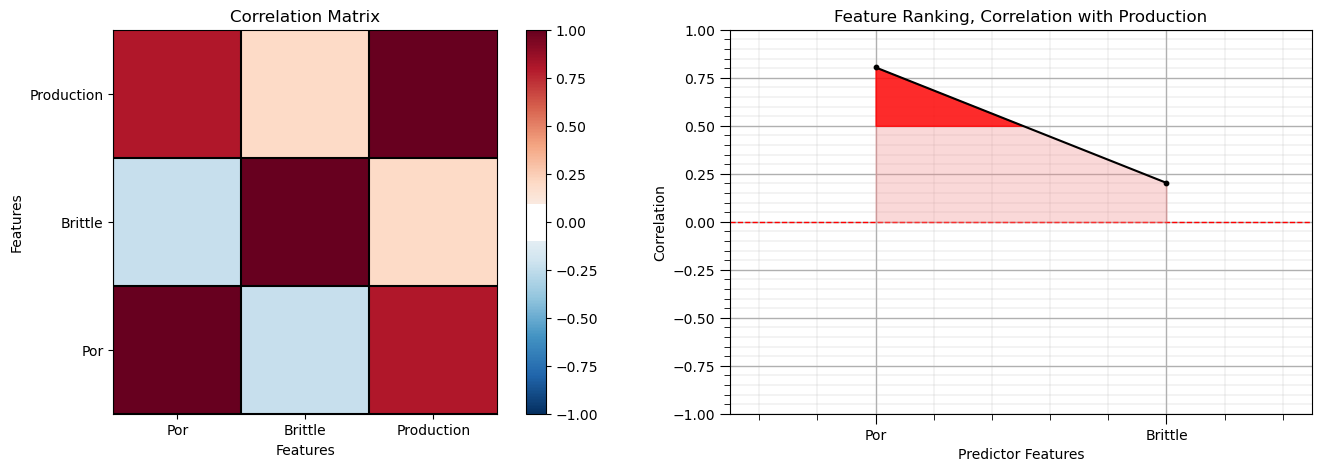

In [11]:
corr_matrix = df.corr()
correlation = corr_matrix.iloc[:,-1].values[:-1]

plt.subplot(121)
plot_corr(corr_matrix,'Correlation Matrix',1.0,0.1)           # using our correlation matrix visualization function
plt.xlabel('Features'); plt.ylabel('Features')

plt.subplot(122)
feature_rank_plot(Xname,correlation,-1.0,1.0,0.0,'Feature Ranking, Correlation with ' + yname,'Correlation',0.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.2, hspace=0.3); plt.show()

Note the 1.0 diagonal resulting from the correlation of each variable with themselves.  

This looks good.  There is a mix of correlation magnitudes. Of course, correlation coefficients are limited to degree of linear correlations.  

* Let's look at the matrix scatter plot to see the pairwise relationship between the features.

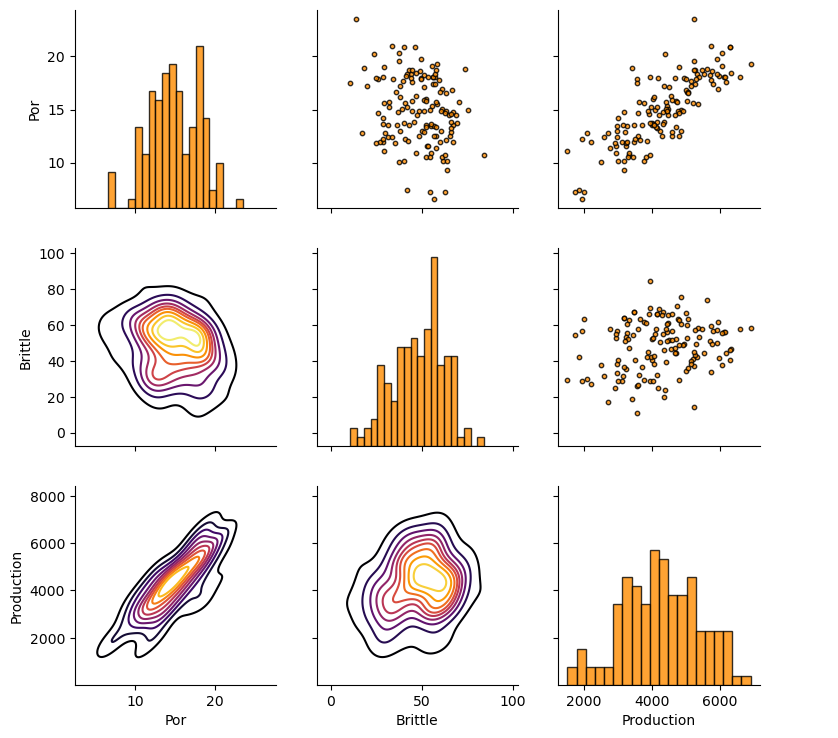

In [13]:
pairgrid = sns.PairGrid(df,vars=Xname+[yname])                # matrix scatter plots
pairgrid = pairgrid.map_upper(plt.scatter, color = 'darkorange', edgecolor = 'black', alpha = 0.8, s = 10)
pairgrid = pairgrid.map_diag(plt.hist, bins = 20, color = 'darkorange',alpha = 0.8, edgecolor = 'k')# Map a density plot to the lower triangle
pairgrid = pairgrid.map_lower(sns.kdeplot, cmap = plt.cm.inferno, 
                              alpha = 1.0, n_levels = 10)
pairgrid.add_legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.2, hspace=0.2); plt.show()

#### Train and Test Split

Since we are working with ensemble methods the train and test split is built into the model training with out-of-bag samples.

* we will work with the entire dataset
* note, we could split a testing dataset for the train, validate, test approach. For simplicity I only use train and test in these workflows.
  
#### Visualize the DataFrame

Visualizing the train and test DataFrame is useful check before we build our models.

* many things can go wrong, e.g., we loaded the wrong data, all the features did not load, etc.

We can preview by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 

In [15]:
df.head(n=5)                                                  # check the loaded DataFrame

,Por,Brittle,Production
0,7.22,63.09,2006.074005
1,13.01,50.41,4244.321703
2,10.03,37.74,2493.189177
3,18.10,56.09,6124.075271
4,16.95,61.43,5951.336259


#### Summary Statistics for Tabular Data

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. 

* The describe command provides count, mean, minimum, maximum, percentiles in a nice data table. 

In [17]:
df.describe(percentiles=[0.1,0.9])                            # check DataFrame summary statistics

,Por,Brittle,Production
count,140.000000,140.000000,140.000000
mean,14.897357,48.345429,4273.644226
std,3.181639,14.157619,1138.466092
min,6.550000,10.940000,1517.373571
10%,10.866000,28.853000,2957.573690
50%,14.855000,50.735000,4315.186629
90%,18.723000,65.813000,5815.526968
max,23.550000,84.330000,6907.632261


It is good that we checked the summary statistics.

* there are no obvious issues
* check out the range of values for each feature to set up and adjust plotting limits. See above.

#### Visualize the Distributions

Let's check the histograms and scatter plots of the predictor features.

* check to make sure the data cover the range of possible predictor feature combinations
* check that the predictor features are not highly correlated, collinear, as this increases model variance

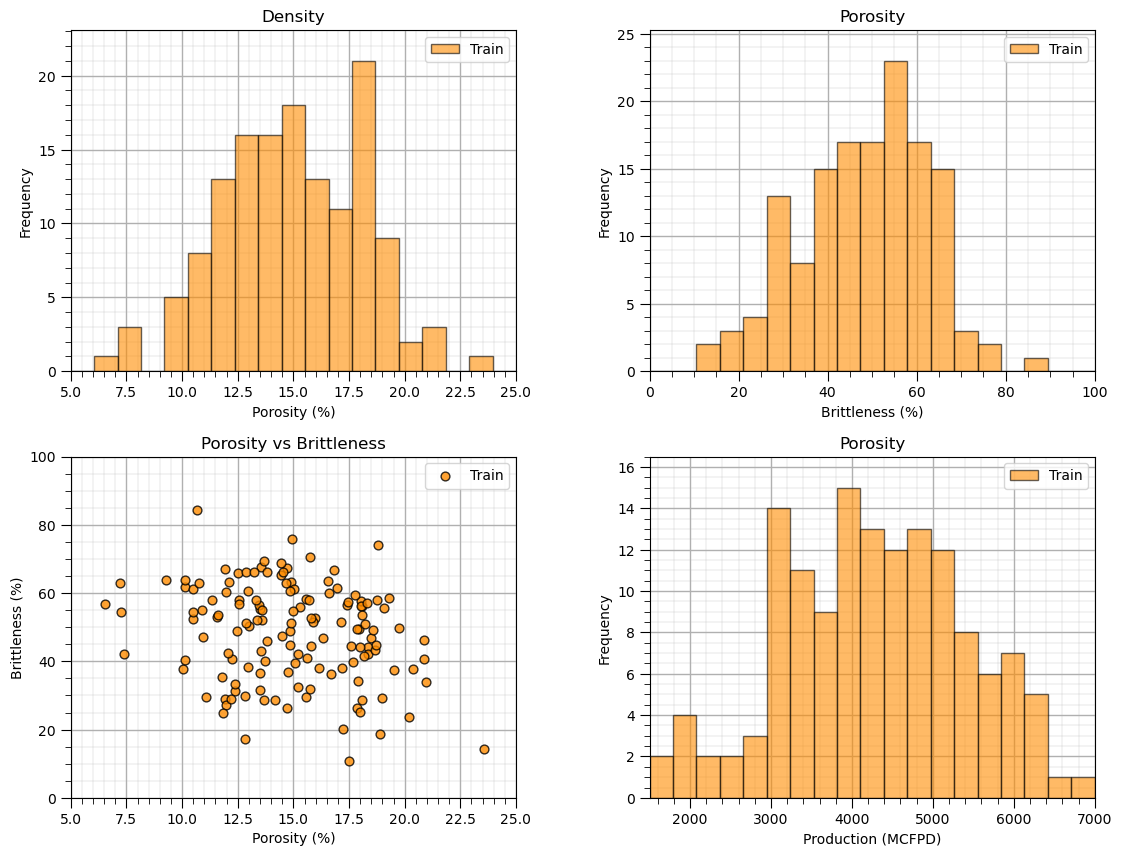

In [19]:
nbins = 20                                                    # number of histogram bins

plt.subplot(221)                                              # predictor feature #1 histogram
freq,_,_ = plt.hist(x=df[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
max_freq = max(freq)*1.10
plt.xlabel(Xlabelunit[0]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Density'); add_grid()  
plt.xlim([Xmin[0],Xmax[0]]); plt.legend(loc='upper right')   

plt.subplot(222)                                              # predictor feature #2 histogram
freq,_,_ = plt.hist(x=df[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
max_freq = max(freq)*1.10
plt.xlabel(Xlabelunit[1]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Porosity'); add_grid()  
plt.xlim([Xmin[1],Xmax[1]]); plt.legend(loc='upper right')   

plt.subplot(223)                                              # predictor features #1 and #2 scatter plot
plt.scatter(df[Xname[0]],df[Xname[1]],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.title(Xlabel[0] + ' vs ' +  Xlabel[1])
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
plt.legend(); add_grid(); plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplot(224)                                              # predictor feature #2 histogram
freq,_,_ = plt.hist(x=df[yname],weights=None,bins=np.linspace(ymin,ymax,nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
max_freq = max(freq)*1.10
plt.xlabel(ylabelunit); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Porosity'); add_grid()  
plt.xlim([ymin,ymax]); plt.legend(loc='upper right') 

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.3, hspace=0.25)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

Once again, the distributions are well behaved, 

* we cannot observe obvious gaps nor truncations.
* the predictor features are not highly correlated

Let's look at a scatter plot of Porosity vs. Brittleness with points colored by Production.

* to visualize the prediction problem, i.e., the shape of the system

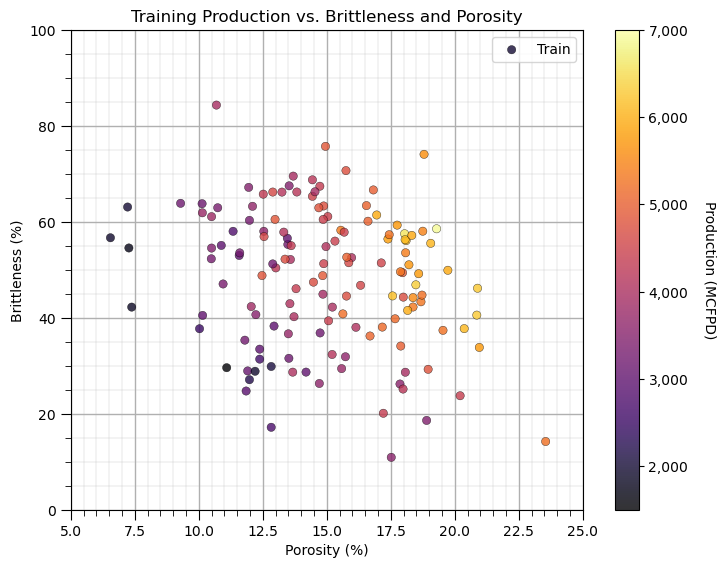

In [21]:
plt.subplot(111)                                              # visualize the train and test data in predictor feature space
im = plt.scatter(X[Xname[0]],X[Xname[1]],s=None, c=y[yname], marker='o', cmap=cmap, 
    norm=None, vmin=ymin, vmax=ymax, alpha=0.8, linewidths=0.3, edgecolors="black", label = 'Train')
plt.title('Training ' + ylabel + ' vs. ' + Xlabel[1] + ' and ' + Xlabel[0]); 
plt.xlabel(Xlabel[0] + ' (' + Xunit[0] + ')'); plt.ylabel(Xlabel[1] + ' (' + Xunit[1] + ')')
plt.xlim(Xmin[0],Xmax[0]); plt.ylim(Xmin[1],Xmax[1]); plt.legend(loc = 'upper right'); add_grid()
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label(ylabel + ' (' + yunit + ')', rotation=270, labelpad=20)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(comma_format))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Ensemble Tree Method - Tree Bagging Regression

We are ready to build a tree bagging model. To perform tree bagging we:

1. set the hyperparameters for the individual trees

```python
seed = 73073
max_depth = 100
min_samples_leaf = 2  
```

2. instantiate an individual regression tree

```python
regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
```

3. set the bagging hyperparameters

```python
num_trees = 100
seed = 73073
```

4. instantiate the bagging regressor with the previously instantiated regression tree (wrapping the decision tree)

```python
bagging_model = BaggingRegressor(base_estimator=regressor, n_estimators=num_trees, random_state=seed)
```

5. train the bagging regression (wrapping the decision tree)


```python
bagging_model.fit(X = predictors, y = response)
```

6. visualize the model result over the feature space (easy to do as we have only 2 predictor features)

#### Demonstration of Bagging by-Hand

For demonstration of by-hand tree bagging let's set the number of trees to 1 and run tree bagging regression 6 times.  

* the result for each is a single complicated decision tree
* note, the random_state parameter is the random number seed for the bootstrap in the bagging method
* the trees vary for each random number seed since the bootstrapped dataset will be different for each

We will loop over the models and store each of them in an list of models.

In [23]:
max_depth = 100; min_samples_leaf = 2                         # set for a complicated tree

regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf) # instantiate a decision tree

num_tree = 1                                                  # use only a single tree for this demonstration
seeds = [73073, 73074, 73075, 73076, 73077, 73078]
bagging_models = []; oob_MSE = []; score = []; pred = []

index = 1
for seed in seeds:                                            # visualize models over random number seeds
    bagging_models.append(BaggingRegressor(base_estimator=regressor,n_estimators=num_tree,random_state=seed,oob_score = True,
                                           bootstrap=True,n_jobs = 4))
    bagging_models[index-1].fit(X = X, y = y)
    oob_MSE.append(bagging_models[index-1].oob_score_)
    plt.subplot(2,3,index)
    bag_X1 = X.iloc[np.asarray(bagging_models[index-1].estimators_samples_[0]),0]
    bag_X2 = X.iloc[np.asarray(bagging_models[index-1].estimators_samples_[0]),1]
    bag_y = y.iloc[np.asarray(bagging_models[index-1].estimators_samples_[0]),0]
    pred.append(visualize_model(bagging_models[index-1],bag_X1,Xmin[0],Xmax[0],bag_X2,Xmin[1],Xmax[1],bag_y,ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Bootstrap Data and Decision Tree #' + str(index) + ' '))
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.4, wspace=0.4, hspace=0.3)

TypeError: BaggingRegressor.__init__() got an unexpected keyword argument 'base_estimator'

Notice the data changes for each model,

* we have bootstrapped the dataset so some of the data are missing and others are used 2 or more times
* recall, in expectation, only 2/3 of the data are used for each tree, and 1/3 is out-of-bag

Let's check the cross validation results with the out-of-bag data.

In [ ]:
index = 1
for index in range(0,len(seeds)):                             # check models over random number seeds
    plt.subplot(2,3,index+1)
    check_model(bagging_models[index],y,ymin,ymax,ylabelunit,'Out-of-Bag Predictions Decision Tree #' +  str(index+1))
    index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.6, top=2.0, wspace=0.3, hspace=0.3)

Now let's demonstrate the averaging of the predictions over the 6 decision trees, we are performing bagging tree prediction by-hand to clearly demonstrate the method.
* we average the predicted response feature (production) over the discretized predictor feature space
* we can take advantage of broadcast methods for operations on entire arrays
* we will apply the same model check, but we will use a modified function to will read in the response feature 2D array, instead of a model

In [ ]:
Z = pred[0] 
index = 1
for seed in seeds:                                            # loop over random number seeds
    if index == 1:
        Z = pred[index-1]
    else:
        Z = Z + pred[index-1]                                 # calculate the average response over 3 trees
    index = index + 1

Z = Z / len(seeds)                                            # grid pixel-wise average of the 6 bootstrapped decision trees
    
plt.subplot(121)                                              # plot predictions over predictor feature space
visualize_grid(Z,df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,ylabelunit,
               Xlabelunit[0],Xlabelunit[1],'All Data and Average of 6 Bootstrapped Trees')

plt.subplot(122)                                              # check model predictions vs. testing dataset
check_grid(Z,Xmin[0],Xmax[0],Xmin[1],Xmax[1],df[Xname[0]],df[Xname[1]],df[yname],ymin,ymax,'Model Check - Average of 6 Bootstrapped Trees')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.8, wspace=0.3, hspace=0.2)

We made 6 complicated trees, each trained with bootstrap resamples of the original data and then averaged the predictions from each.

* the result is more smooth - lower model variance 

* the result more closely matches the training data

#### Demonstration of Bagging with Increasing Number of Trees

For demonstration, let's build 6 bagging tree regression models with increasing number of overly complicated (and likely overfit) trees averaged.

* with the bagging regressor from scikit learn this is automated with the 'num_tree' hyperparameter

We will loop over the models and store each of them in an list of models again!

In [ ]:
max_depth = 3; min_samples_leaf = 5                           # set for a complicated tree

regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf) # instantiate a decision tree

seed = 73073;
num_trees = [1,3,5,10,30,500]                                 # number of trees averaged for each estimator

bagging_models_ntrees = []; oob_MSE = []; pred = []

index = 1
for num_tree in num_trees:                                    # visualize the models over number of trees
    bagging_models_ntrees.append(BaggingRegressor(base_estimator=regressor,n_estimators=num_tree,random_state=seed,oob_score = True,n_jobs = 4))
    bagging_models_ntrees[index-1].fit(X = X, y = y)
    plt.subplot(2,3,index)
    pred.append(visualize_model(bagging_models_ntrees[index-1],df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Bagging with ' + str(num_tree) + ' Trees'))
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.4, wspace=0.4, hspace=0.3)

Observe the impact of averaging an increasing number of trees. 

* we transition from a discontinuous response prediction model to a smooth prediction model (the jumps are smoothed out)

Let's repeat the modeling cross validation step with the withheld testing data.

In [ ]:
index = 1
for num_tree in num_trees:                                    # check models over number of trees
    plt.subplot(2,3,index)
    check_model_OOB_MSE(bagging_models_ntrees[index-1],y,ymin,ymax,ylabelunit,'Out-of-Bag Predictions with ' + 
                        str(num_trees[index-1]) + ' Decision Trees')
    index = index + 1
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.6, top=2.0, wspace=0.3, hspace=0.3)

See the improvement with testing accuracy with increasing level of ensemble model averaging?

Let's run many cases and check the accuracy vs. number of trees.

In [ ]:
max_depth = 3; min_samples_leaf = 5                           # set for a complicated tree

regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf) # instantiate a decision tree
ntree_list = []; MSE_oob_list = []
for num_tree in np.arange(1,350,50):                          # check OOB MSE over number of trees
    bagg_tree = BaggingRegressor(base_estimator=regressor,n_estimators=num_tree,random_state=seed,oob_score = True,n_jobs = 4).fit(X = X, y = y)
    oob_y_hat = bagg_tree.oob_prediction_
    oob_y = y[oob_y_hat > 0.0]; oob_y_hat = oob_y_hat[oob_y_hat > 0.0]; # remove if not estimated
    MSE_oob_list.append(metrics.mean_squared_error(oob_y,oob_y_hat)); ntree_list.append(num_tree)

plt.scatter(ntree_list,MSE_oob_list,color='darkorange',edgecolor='black',alpha=0.8,s=30,zorder=10)
plt.plot(ntree_list,MSE_oob_list,color='black',ls='--',zorder=1)
plt.xlabel('Number of Bagged Trees'); plt.ylabel('Mean Square Error'); plt.title('Out-of-Bag Mean Square Error vs Number of Bagged Trees')
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format)); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

The number of trees improves model accuracy through reduction in model variance. Let's actually observe this reduction in model variance with an experiment.

#### Model Variance vs. Ensemble Model Averaging

Let's see the change in model variance through model averaging, we will compare multiple models with different numbers of trees averaged.

* we accomplish this by visual comparison, let's look at different bagging modeling through changing the random number seed

In [ ]:
max_depth = 3; min_samples_leaf = 5                           # set for a complicated tree

regressor = DecisionTreeRegressor(max_depth = max_depth, min_samples_leaf = min_samples_leaf) # instantiate a decision tree

seeds = [73083, 73084, 73085]                                 # number of random number seeds
num_trees = [1,5,30,100]                                      # number of trees averaged for each estimator
bagging_models_ntrees_seeds = []
MSE_oob_list = []; ntree_list = []

index = 1
for num_tree in num_trees:                                    # loop over number of trees
    for seed in seeds:                                        # loop over number of random number seeds
        bagg_tree = BaggingRegressor(base_estimator=regressor, n_estimators=num_tree, 
                                     random_state=seed, oob_score = True, n_jobs = 4).fit(X = X, y = y)
        oob_y_hat = bagg_tree.oob_prediction_
        oob_y = y[oob_y_hat > 0.0]; oob_y_hat = oob_y_hat[oob_y_hat > 0.0]; # remove if not estimated
        bagging_models_ntrees_seeds.append(bagg_tree)
        MSE_oob_list.append(metrics.mean_squared_error(oob_y,oob_y_hat)); ntree_list.append(num_tree)
        plt.subplot(4,3,index)
        visualize_model(bagging_models_ntrees_seeds[index-1],df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Training Data and Tree Model - ' + str(num_tree) + ' Tree(s)')
        index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=4.0, wspace=0.35, hspace=0.3); plt.show()

As we increase the number of decision trees averaged for the bagged tree regression models:

* once again, the response predictions over the predictor feature space gets more smooth

* the multiple realizations of the model start to converge, this is lower model variance

#### Random Forest

With random forest we limit the number of features considered for each split. Note, in scikit learn the default is $\frac{m}{3}$. Use this hyperparameter to set to square root of the number of predictor features. Another common alternative in practice $\sqrt{m}$.

```python
max_features = 'sqrt'
```
This forces tree diversity / decorrelates the trees.

* recall the model variance reduced by averaging over multiple decision trees $Y = \frac{1}{B} \sum_{b=1}^{B} Y^b(X_1^b,...,X_m^b)$

* recall from the [spatial bootstrap workflow](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Spatial_Bootstrap.ipynb) that correlation of samples being averaged attenuates the variance reduction

Let's experiment with random forest to demonstrate this.  

1. Set the hyperparameters.

Even if I am just running one model, I set the random number seed to ensure I have a deterministic model, a model that can be rerun to get the same result every time. If the random number seed is not set, then it is likely set based on the system time.

```python
seed = 73073
```

We will overfit the trees, let them grow overly complicated. Once again, the ensemble approach will mitigate model variance and overfit.

```python
max_depth = 5
```

We will use a large number of trees to mitigate model variance and to benefit from random forest tree diversity.

```python
num_tree = 300
```

We are using a simple 2 predictor feature example for ease of visualization.  The default for scikit learn's random forest is to select $\frac{m}{3}$  features at random for consideration for each split.  

This doesn't make much sense when $m = 2$, as with our case, so we set the maximum number of features considered for each split to 1.  

* We are forcing random selection of porosity or brittleness for consideration with each split, hierarchical binary segmentation.

```python
max_features = 1
```
2. Instantiate the random forest regressor with our hyperparameters  

```python
my_first_forest = RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features)
```

5. Train the random forest regression


```python
my_first_forest.fit(X = predictors, y = response)
```

6. Visualize the model result over the feature space (easy to do as we have only 2 predictor features)

Let's build, visualize and cross validate our first random forest regression model.

In [ ]:
seed = 73093                                                  # set the random forest hyperparameters
max_depth = 7
num_tree = 300
max_features = 1

my_first_forest = RandomForestRegressor(max_depth=max_depth,random_state=seed,n_estimators=num_tree,max_features=max_features,
                                       oob_score=True,bootstrap=True)

my_first_forest.fit(X = X, y = y)                             # train the model with training data 

plt.subplot(121)                                              # predict with the model over the predictor feature space and visualize
visualize_model(my_first_forest,df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Training Data and Random Forest Model')

plt.subplot(122)                                              # perform cross validation with withheld testing data
check_model_OOB_MSE(my_first_forest,y,ymin,ymax,ylabelunit,'Out-of-Bag Predictions with Random Forest')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.0, wspace=0.4, hspace=0.2); plt.show()

The power of tree diversity!  We just built our best model so far.  

* the conditional bias has decreased (our plot has a slope closer to 1:1)

* we have the lower out-of-bag mean score error

Let's run some tests to make sure we understand random forest regression model.

First let's confirm that only one feature (at random) is considered for each split

* limit ourselves to maximum depth = 1, only one split

* limit ourselves to a single tree in each forest!

This way we can see the diversity in the first splits over multiple models.

In [ ]:
max_depth = 1                                                 # set the random forest hyperparameters
num_tree = 1
max_features = 1
simple_forest = []

seeds = [73103,73104,73105,73106,73107,73108]                 # set the random number seeds

index = 1
for seed in seeds:                                            # loop over random number seeds
    simple_forest.append(RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features))
    simple_forest[index-1].fit(X = X, y = y)
    plt.subplot(2,3,index)                                    # predict with the model over the predictor feature space and visualize
    visualize_model(simple_forest[index-1],df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Training Data and Random Forest Model')
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.2, hspace=0.3)

Notice that the first splits are 50/50 porosity and brittleness.  

* aside, for all decision trees that I have fit to this dataset, porosity is always the feature selected for the first 2-3 levels of the tree.  

* the random forest has resulted in model diversity by limiting the predictor features under consideration for the first split!

Just incase you don't trust this, let's rerun the above code with both predictors allowed for all splits.

In [ ]:
max_depth = 1                                                 # set the random forest hyperparameters
num_tree = 1
max_features = 2
simple_forest = []

seeds = [73103,73104,73105,73106,73107,73108]                 # random number seeds 

index = 1
for seed in seeds:                                            # loop over random number seeds
    simple_forest.append(RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features))
    simple_forest[index-1].fit(X = X, y = y)
    plt.subplot(2,3,index)                                    # predict with the model over the predictor feature space and visualize
    visualize_model(simple_forest[index-1],df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Training Data and Random Forest Model')
    index = index + 1
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.0, wspace=0.4, hspace=0.3)

Now we have a set of first splits that vary (due to the bootstrap of the training data), but are all over porosity.

#### Model Performance by Out-of-Bag and Feature Importance

Since we are now building a more robust model with a large ensemble of trees, let's get more serious about model checking.

* we will look at out-of-bag mean square error

* we will look at feature importance

Let's start with a pretty big forest, this may take a while to run!

In [ ]:
seed = 73093                                                  # set the random forest hyperparameters
max_depth = 7
num_tree = 500
max_features = 1

big_forest = RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features,
                                   oob_score = True,bootstrap=True,n_jobs = 4)

big_forest.fit(X = X, y = y)

plt.subplot(121)                                              # predict with the model over the predictor feature space and visualize
visualize_model(big_forest,df[Xname[0]],Xmin[0],Xmax[0],df[Xname[1]],Xmin[1],Xmax[1],df[yname],ymin,ymax,
                ylabelunit,Xlabelunit[0],Xlabelunit[1],'Training Data and Random Forest Model')

plt.subplot(122)                                              # perform cross validation with withheld testing data
check_model_OOB_MSE(big_forest,y,ymin,ymax,ylabelunit,'Model Check Random Forest Model')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.0, wspace=0.4, hspace=0.2)

To get the feature importance we just have to access the model member 'feature_importance_'.

* we had to set feature_importance to true in the model instantiation for this to be available

* this measure is standardized to sum to 1.0

* same order as the predictor features in the 2D array, porosity and then brittleness

* feature importance is the proportion of total MSE reduction through splits for each feature

* we can access the importance for each feature for each tree in the forest or the global average for each over the entire forest

We get the global average of feature importance with this member of the random forest regressor model.

````python
importances = big_forest.feature_importances_ 
````
Let's plot the feature importance with significance calculated from the ensemble.

* when we report model-based feature importance, it is always a good idea to show that the model is a good model. I like to show a model check beside the feature importance result, in this case the out-of-bag cross validation plot and mean square error. 

In [ ]:
importances = big_forest.feature_importances_                 # expected (global) importance over the forest fore each predictor feature
std = np.std([tree.feature_importances_ for tree in big_forest.estimators_],axis=0) # retrieve importance by tree
indices = np.argsort(importances)[::-1]                       # sort in descending feature importance
features = ['Porosity','Brittleness']                         # names or predictor features

plt.subplot(121)
plt.title("Random Forest Feature Importances")
plt.bar(features, importances[indices],color="darkorange", alpha = 0.8, edgecolor = 'black', yerr=std[indices], align="center")
plt.ylim(0,1), plt.xlabel('Predictor Features'); plt.ylabel('Feature Importance'); add_grid()

plt.subplot(122)                                              # perform cross validation with withheld testing data
check_model_OOB_MSE(big_forest,y,ymin,ymax,ylabelunit,'Model Check Random Forest Model for Feature Importance')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=0.8, wspace=0.2, hspace=0.2); plt.show()

Let's try some hyperparameter training with the out-of-bag mean square error measure from our forest.

Let's start with the number of trees in our forest.

In [ ]:
max_depth = 5                                                 # set the random forest hyperparameters
num_trees = np.arange(1,100,2)
max_features = 1
trained_forests = []
MSE_oob_list = []; ntree_list = []

index = 1
for num_tree in num_trees:                                     # loop over number of trees in our random forest
    trained_forest = RandomForestRegressor(max_depth=max_depth, random_state=seed,n_estimators=int(num_tree),
            oob_score = True,bootstrap=True,max_features=max_features).fit(X = X, y = y)
    trained_forests.append(trained_forest)
    oob_y_hat = trained_forest.oob_prediction_
    oob_y = y[oob_y_hat > 0.0]; oob_y_hat = oob_y_hat[oob_y_hat > 0.0]; # remove if not estimated
    MSE_oob_list.append(metrics.mean_squared_error(oob_y,oob_y_hat)); ntree_list.append(num_tree)
    index = index + 1
    
plt.subplot(121)
plt.scatter(ntree_list,MSE_oob_list,color='darkorange',edgecolor='black',alpha=0.8,s=30,zorder=10)
plt.plot(ntree_list,MSE_oob_list,color='black',ls='--',zorder=1)
plt.xlabel('Number of Random Forest Trees'); plt.ylabel('Mean Square Error'); plt.title('Out-of-Bag Mean Square Error vs Number of Random Forest Trees')
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format)); add_grid(); plt.xlim([min(ntree_list),max(ntree_list)])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.2, hspace=0.2); plt.show()

Now let's try the depth of the trees, given enough trees (we'll use 60 trees) as determined above.

In [ ]:
max_depths = np.linspace(1,20,20)                             # set the tree maximum tree depths to consider

num_tree = 60                                                 # set the random forest hyperparameters
max_features = 1
trained_forests = []
MSE_oob_list = []; max_depth_list = []

index = 1
for max_depth in max_depths:                                  # loop over tree depths    
    trained_forest = RandomForestRegressor(max_depth=int(max_depth), random_state=seed,n_estimators=num_tree,
            oob_score = True,bootstrap=True,max_features=max_features).fit(X = X, y = y)
    trained_forests.append(trained_forest)
    oob_y_hat = trained_forest.oob_prediction_
    oob_y = y[oob_y_hat > 0.0]; oob_y_hat = oob_y_hat[oob_y_hat > 0.0]; # remove if not estimated
    MSE_oob_list.append(metrics.mean_squared_error(oob_y,oob_y_hat)); max_depth_list.append(max_depth)
    index = index + 1
    
plt.subplot(121)                                                # plot OOB MSE vs. maximum tree depth
plt.scatter(max_depth_list,MSE_oob_list,color='darkorange',edgecolor='black',alpha=0.8,s=30,zorder=10)
plt.plot(max_depth_list,MSE_oob_list,color='black',ls='--',zorder=1)
plt.xlabel('Tree Maximum Depth'); plt.ylabel('Mean Square Error'); plt.title('Out-of-Bag Mean Square Error vs Tree Maximum Depth')
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format)); add_grid(); plt.xlim([min(max_depth_list),max(max_depth_list)])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.2, hspace=0.2); plt.show()

It looks like we need a maximum tree depth of at least 10 for best performance of our model with respect to out-of-bag mean square error.

* note that our model is robust and resistant to overfit, the out-of-bag performance evaluation is close to monotonically increasing.

#### Machine Learning Pipelines for Clean, Compact Machine Learning Code

Pipelines are a scikit-learn class that allows for the encapsulation of a sequence of data preparation and modeling steps

* then we can treat the pipeline as an object in our much condensed workflow

The pipeline class allows us to:

* improve code readability and to keep everything straight

* build complete workflows with very few lines of readable code 

* avoid common workflow problems like data leakage, testing data informing model parameter training 

* abstract common machine learning modeling and focus on building the best model possible

The fundamental philosophy is to treat machine learning as a combinatorial search to find the best model (AutoML)

For more information see my recorded lecture on [Machine Learning Pipelines](https://www.youtube.com/watch?v=tYrPs8s1l9U&list=PLG19vXLQHvSAufDFgZEFAYQEwMJXklnQV&index=5) and a well-documented demonstration [Machine Learning Pipeline Workflow](http://localhost:8892/notebooks/OneDrive%20-%20The%20University%20of%20Texas%20at%20Austin/Courses/Workflows/PythonDataBasics_Pipelines.ipynb).

In [ ]:
x1 = 0.25; x2 = 0.3                                           # predictor values for the prediction

pipe_forest = Pipeline([                                      # the machine learning workflow as a pipeline object
    ('forest', RandomForestRegressor())
])

params = {                                                    # the machine learning workflow method's parameters to search
    'forest__max_leaf_nodes': np.arange(2,100,2,dtype = int),
}

tuned_forest = GridSearchCV(pipe_forest,params,scoring = 'neg_mean_squared_error', # hyperparameter tuning w. grid search k-fold cross validation 
                             refit = True)
tuned_forest.fit(X,y)                                         # fit model with tuned hyperparameters to all the data

print('Tuned hyperparameter: max_leaf_nodes = ' + str(tuned_forest.best_params_))

estimate = tuned_forest.predict([[x1,x2]])[0]                 # make a prediction (no tuning shown)
print('Estimated ' + ylabel + ' for ' + Xlabel[0] + ' = ' + str(x1) + ' and ' + Xlabel[1] + ' = ' + str(x2)  + ' is ' + 
      str(round(estimate,1)) + ' ' + yunit) # print results

#### Practice on a New Dataset

Ok, time to get to work. Let's load up a dataset and build a random forest prediction model with,

* compact code

* basic visaulizations

* save the output

You can select any of these datasets or modify the code and add your own to do this.

##### Dataset 0, Unconventional Multivariate v4

Let's load the provided multivariate, dataset [unconv_MV.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV_v4.csv). This dataset has variables from 1,000 unconventional wells including:

* well average porosity
* log transform of permeability (to linearize the relationships with other variables)
* acoustic impedance (kg/m^3 x m/s x 10^6)
* brittleness ratio (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial production 90 day average (MCFPD).

##### Dataset 2, Reservoir 21

Let's load the provided multivariate, 3D spatial dataset [res21_wells.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/res21_wells.csv). This dataset has variables from 73 vertical wells over a 10,000m x 10,000m x 50 m reservoir unit:

* well (ID)
* X (m), Y (m), Depth (m) location coordinates
* Porosity (%) after units conversion
* Permeability (mD)
* Acoustic Impedance (kg/m2s*10^6) after units conversion
* Facies (categorical) - ordinal with ordering from Shale, Sandy Shale, Shaley Sand, to Sandstone.
* Density (g/cm^3)
* Compressible velocity (m/s)
* Youngs modulus (GPa)
* Shear velocity (m/s)
* Shear modulus (GPa)
* 3 year cumulative oil production (Mbbl)

We load the tabular data with the pandas 'read_csv' function into a DataFrame we called 'my_data' and then preview it to make sure it loaded correctly.

* we also populate lists with data ranges and labels for ease of plotting

Load and format the data,

* drop the response feature
* reformate the features as needed
* also, I like to store the metadata in lists

In [75]:
idata = 0                                                     # select the dataset

if idata == 0:
    df_new = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv') # load data from Dr. Pyrcz's GitHub repository  
    df_new.drop(['Well'],axis=1,inplace=True)                 # remove well index and response feature

    features = df_new.columns.values.tolist()                 # store the names of the features

    xname = features[:-1]
    yname = [features[-1]]
       
    xmin_new = [6.0,0.0,1.0,10.0,0.0,0.9]; xmax_new = [24.0,10.0,5.0,85.0,2.2,2.9] # set the minimum and maximum values for plotting
    ymin_new = 0.0; ymax_new = 10000.0
    xlabel_new = ['Porosity (%)','Permeability (mD)','Acoustic Impedance (kg/m2s*10^6)','Brittleness Ratio (%)', # set the names for plotting
             'Total Organic Carbon (%)','Vitrinite Reflectance (%)']

    ylabel_new = 'Production (MCFPD)'
    
    xtitle_new = ['Porosity','Permeability','Acoustic Impedance','Brittleness Ratio', # set the units for plotting
             'Total Organic Carbon','Vitrinite Reflectance']

    ytitle_new = 'Production'

    y = pd.DataFrame(df_new[yname])                              # extract selected features as X and y DataFrames  
    X = df_new[xname]

elif idata == 1:
    names = {'Porosity':'Por'}
    
    df_new = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv') # load data from Dr. Pyrcz's GitHub repository  
    df_new.drop(['X','Y','Unnamed: 0','Facies'],axis=1,inplace=True)   # remove response feature
    df_new = df_new.rename(columns=names)
    df_new['Por'] = df_new['Por'] * 100.0; df_new['AI'] = df_new['AI'] / 1000.0
    features = df_new.columns.values.tolist()                 # store the names of the features

    xname = features[:-1]
    yname = [features[-1]]
    
    xmin_new = [4.0,0.0]; xmax_new = [19.0,500.0] # set the minimum and maximum values for plotting

    ymin_new = 1.60; ymax_new = 6.20
    
    xlabel_new = ['Porosity (fraction)','Permeability (mD)'] # set the names for plotting

    ylabel_new = 'Acoustic Impedance (kg/m2s*10^6)'
    
    xtitle_new = ['Porosity','Permeability']

    ytitle_new = 'Acoustic Impedance (kg/m2s*10^6)'

    y = pd.DataFrame(df_new[yname])                              # extract selected features as X and y DataFrames  
    X = df_new[xname]

elif idata == 2:  
    df_new = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/res21_2D_wells.csv') # load data from Dr. Pyrcz's GitHub repository  
    df_new.drop(['Well_ID','X','Y'],axis=1,inplace=True) # remove Well Index, X and Y coordinates, and response feature
    df_new = df_new.dropna(how='any',inplace=False)
     
    features = df_new.columns.values.tolist()                 # store the names of the features

    xname = features[:-1]
    yname = [features[-1]]
    
    xmin_new = [1,0.0,0.0,4.0,0.0,6.5,1.4,1600.0,10.0,1300.0,1.6]; xmax_new = [73,10000.0,10000.0,19.0,500.0,8.3,3.6,6200.0,50.0,2000.0,12.0] # set the minimum and maximum values for plotting

    ymin_new = 0.0; ymax_new = 1600.0
    
    xlabel_new = ['Well (ID)','X (m)','Y (m)','Depth (m)','Porosity (fraction)','Permeability (mD)','Acoustic Impedance (kg/m2s*10^6)','Facies (categorical)',
              'Density (g/cm^3)','Compressible velocity (m/s)','Youngs modulus (GPa)', 'Shear velocity (m/s)', 'Shear modulus (GPa)'] # set the names for plotting

    ylabel_new = 'Production (Mbbl)'
    
    xtitle_new = ['Well','X','Y','Depth','Porosity','Permeability','Acoustic Impedance','Facies',
              'Density','Compressible velocity','Youngs modulus', 'Shear velocity', 'Shear modulus']

    ytitle_new = 'Production'

    y = pd.DataFrame(df_new[yname])                              # extract selected features as X and y DataFrames  
    X = df_new[xname]

df_new.head(n=13)

,Por,Perm,AI,Brittle,TOC,VR,Prod
0,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819
1,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063
2,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259
3,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854
4,17.52,4.57,3.18,10.94,1.51,1.90,2859.469624
5,14.53,4.81,2.69,53.60,0.94,1.67,4017.374438
6,13.49,3.60,2.93,63.71,0.80,1.85,2952.812773
7,11.58,3.03,3.25,53.00,0.69,1.93,2670.933846
8,12.52,2.72,2.43,65.77,0.95,1.98,2474.048178
9,13.25,3.94,3.71,66.20,1.14,2.65,2722.893266


##### Build and Check Model

We apply the follow steps,

1. specify the K-fold method
2. loop over number of leaf nodes, instantiate, fit and record the error
3. plot the test error vs. number of leaf nodes, select the hyperparameter that minimizes test error
4. retrain the model with the tuned hyperparameter and all of the data

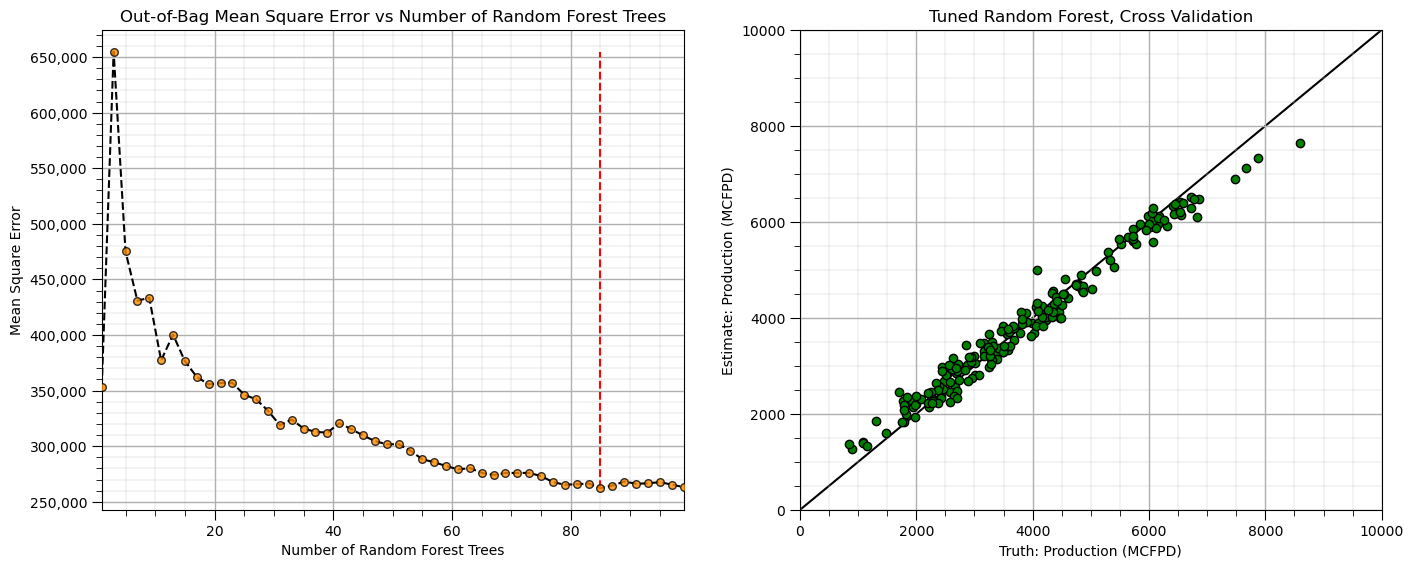

In [78]:
max_leaf_nodes = 30                                           # set the random forest hyperparameters
num_trees = np.arange(1,100,2)
max_features = max(1,int(len(xname)/3.0))                     # use the m/3 for regression rule
trained_forests = []
MSE_oob_list = []; ntree_list = []

index = 1
for num_tree in num_trees:                                    # loop over number of trees in our random forest
    trained_forest = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=seed,n_estimators=int(num_tree),
            oob_score = True,bootstrap=True,max_features=max_features).fit(X = X, y = y)
    trained_forests.append(trained_forest)
    oob_y_hat = trained_forest.oob_prediction_
    oob_y = y[oob_y_hat > 0.0]; oob_y_hat = oob_y_hat[oob_y_hat > 0.0]; # remove if not estimated
    MSE_oob_list.append(metrics.mean_squared_error(oob_y,oob_y_hat)); ntree_list.append(num_tree)
    index = index + 1

tune_num_trees = ntree_list[np.argmin(MSE_oob_list)]          # get the number of trees that minimizes the OOB error

plt.subplot(121)
plt.scatter(ntree_list,MSE_oob_list,color='darkorange',edgecolor='black',alpha=0.8,s=30,zorder=10)
plt.plot(ntree_list,MSE_oob_list,color='black',ls='--',zorder=1)
plt.plot([tune_num_trees,tune_num_trees],[min(MSE_oob_list),max(MSE_oob_list)],color='red',ls='--')
plt.xlabel('Number of Random Forest Trees'); plt.ylabel('Mean Square Error'); plt.title('Out-of-Bag Mean Square Error vs Number of Random Forest Trees')
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format)); add_grid(); plt.xlim([min(ntree_list),max(ntree_list)])

tuned_forest = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=seed,n_estimators=tune_num_trees,
            oob_score = False,bootstrap=True,max_features=max_features).fit(X = X, y = y)

y_hat = tuned_forest.predict(X)                               # predict over all samples

plt.subplot(122)
plt.scatter(y,y_hat,color='green',edgecolor='black') # cross validation plot
plt.plot([ymin_new,ymax_new],[ymin_new,ymax_new],color='black',zorder=-1)
plt.xlim(ymin_new,ymax_new); plt.ylim(ymin_new,ymax_new); add_grid() 
plt.xlabel('Truth: ' + ylabel_new); plt.ylabel('Estimate: ' + ylabel_new)
plt.title('Tuned Random Forest, Cross Validation')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Comments

I hope you found this chapter helpful. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources),

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)